
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


### Question(s) for Analysis

Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

In [29]:
# Import statements for all of the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [30]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [31]:
# Check raw and column
df.shape

(10866, 21)

In [32]:
# check describtion
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

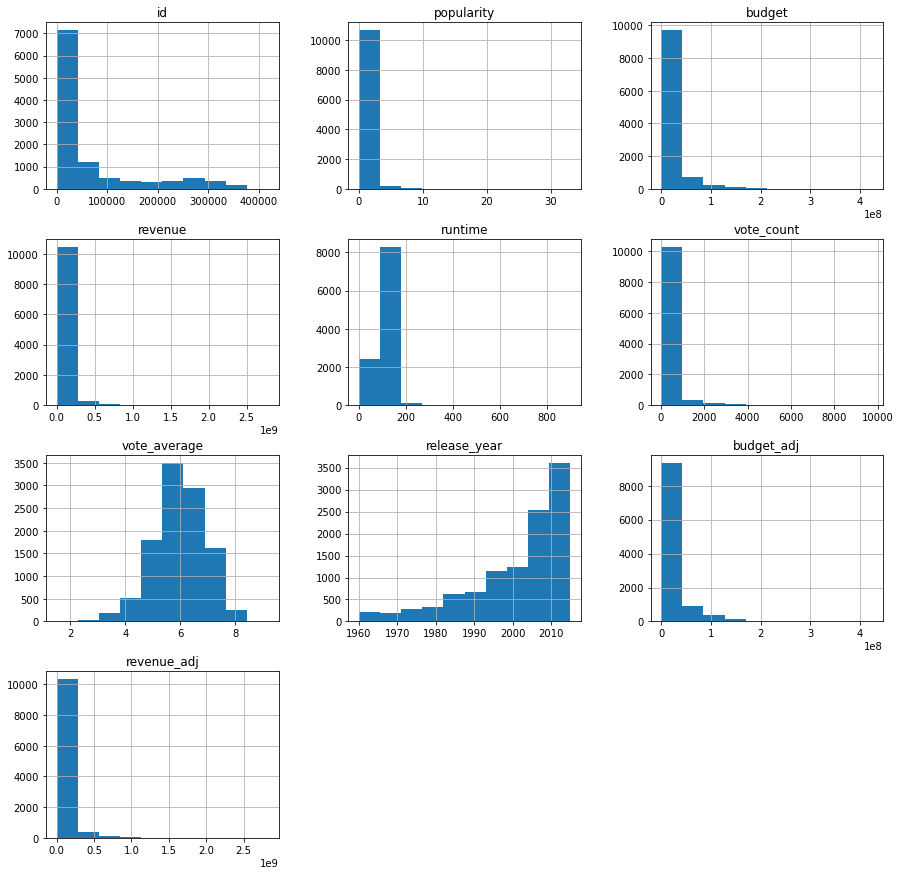

In [33]:
df.hist(figsize=(15, 15))


### Data Cleaning
 

In [34]:
# Treat the genres column with explode function to separate them.
df.explode('genres')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [35]:
# make filter to remove value = zero
df = df.query('budget > 0')
df['budget'].unique()

array([150000000, 110000000, 200000000, 190000000, 135000000, 155000000,
       108000000,  74000000, 175000000, 245000000, 176000003,  15000000,
        88000000, 280000000,  44000000,  48000000, 130000000,  95000000,
       160000000,  30000000,  40000000,  28000000,  68000000,  81000000,
        20000000,  61000000,  49000000,  29000000,  58000000,   6000000,
        50000000,  11000000,  90000000,  75000000,  25000000,  10000000,
        12000000,   4000000,  11800000,  35000000,  55000000,  60000000,
       105000000,  26000000,  70000000, 120000001,   3500000,  65000000,
        50100000, 100000000,  13000000,  99000000,   2500000,  34000000,
        80000000,  17000000,  31000000,   5000000,  64000000,  11930000,
         8500000,  23000000,  53000000,   8900000,    700000,  14800000,
        19500000,   1000000,   8000000,   1800000,   2000000,  18000000,
          630019,  14000000,  37000000,   7000000,   3000000,   9600000,
         2240000,   3300000,    100000,  21000000, 

In [36]:
# Check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5170 non-null   int64  
 1   imdb_id               5169 non-null   object 
 2   popularity            5170 non-null   float64
 3   budget                5170 non-null   int64  
 4   revenue               5170 non-null   int64  
 5   original_title        5170 non-null   object 
 6   cast                  5159 non-null   object 
 7   homepage              1707 non-null   object 
 8   director              5166 non-null   object 
 9   tagline               4554 non-null   object 
 10  keywords              4839 non-null   object 
 11  overview              5170 non-null   object 
 12  runtime               5170 non-null   int64  
 13  genres                5169 non-null   object 
 14  production_companies  5034 non-null   object 
 15  release_date        

In [37]:
# Delete the missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 10760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1446 non-null   int64  
 1   imdb_id               1446 non-null   object 
 2   popularity            1446 non-null   float64
 3   budget                1446 non-null   int64  
 4   revenue               1446 non-null   int64  
 5   original_title        1446 non-null   object 
 6   cast                  1446 non-null   object 
 7   homepage              1446 non-null   object 
 8   director              1446 non-null   object 
 9   tagline               1446 non-null   object 
 10  keywords              1446 non-null   object 
 11  overview              1446 non-null   object 
 12  runtime               1446 non-null   int64  
 13  genres                1446 non-null   object 
 14  production_companies  1446 non-null   object 
 15  release_date        

In [38]:
# Check duplicate value
sum(df.duplicated())

0

In [39]:
# Check data type of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [40]:
# modifation type of 'runtime', 'release_date', 'release_year' to datetime
df['runtime'] = pd.to_datetime(df['runtime'])
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                 datetime64[ns]
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In [41]:
# make function to avoid repetitive code (title)
def title(title_name):
    plt.title(f"{title_name}", color='red', weight='bold', fontsize=20);

In [42]:
# make function to avoid repetitive code (label_one)
def label_one(label_name):
    plt.xlabel(f"{label_name}", color='orange', weight='bold', fontsize=20);

In [43]:
# make function to avoid repetitive code (label_two)
def label_two(label_name):
    plt.ylabel(f"{label_name}", color='blue', weight='bold', fontsize=20);

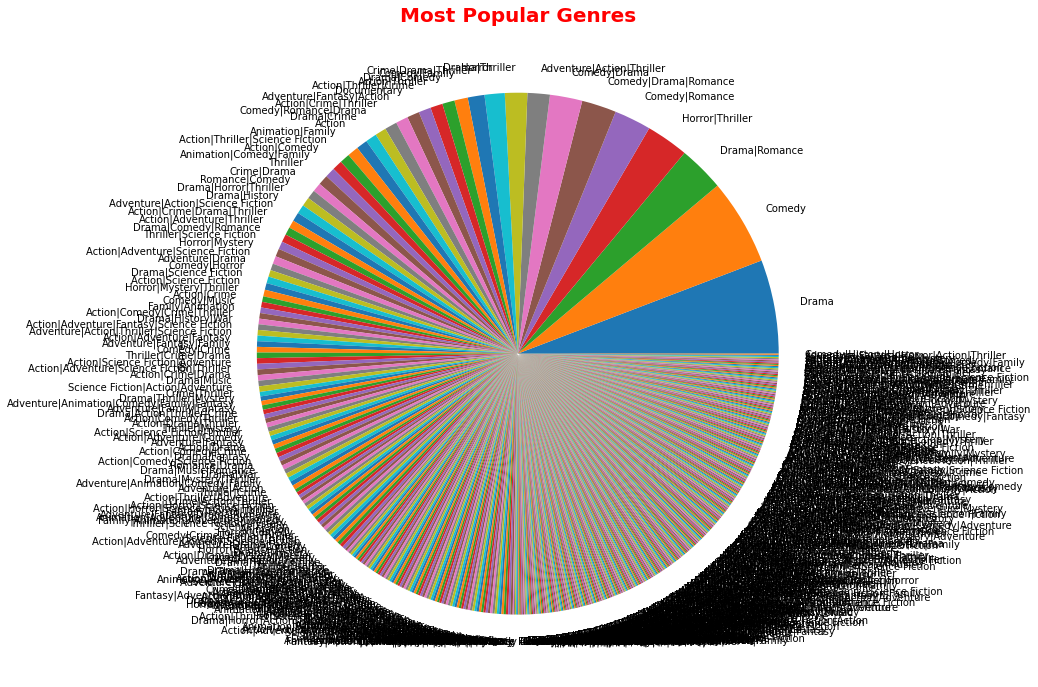

In [44]:
# Check for the count of  genres to find the most popular
df['genres'].value_counts().plot(kind="pie", fontsize=10, figsize=(12, 12));
title('Most Popular Genres')

With this pie charts, it was confirmed that drama is the most popular genre from year to year.
Comedy comes in second place, then romantic drama

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [45]:
# Check for correlation
df.corr()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.137239,-0.082557,-0.059754,0.020949,-0.039677,0.494843,-0.141589,-0.120590
popularity,0.137239,1.000000,0.456010,0.610533,0.754298,0.353530,0.041474,0.444581,0.566657
budget,-0.082557,0.456010,1.000000,0.716637,0.601012,0.112172,0.148468,0.986022,0.584214
revenue,-0.059754,0.610533,0.716637,1.000000,0.785225,0.301512,0.009016,0.723403,0.917981
vote_count,0.020949,0.754298,0.601012,0.785225,1.000000,0.451509,0.052028,0.591913,0.716183
vote_average,-0.039677,0.353530,0.112172,0.301512,0.451509,1.000000,-0.169788,0.125229,0.323519
release_year,0.494843,0.041474,0.148468,0.009016,0.052028,-0.169788,1.000000,0.031327,-0.232109
budget_adj,-0.141589,0.444581,0.986022,0.723403,0.591913,0.125229,0.031327,1.000000,0.628361
revenue_adj,-0.120590,0.566657,0.584214,0.917981,0.716183,0.323519,-0.232109,0.628361,1.000000


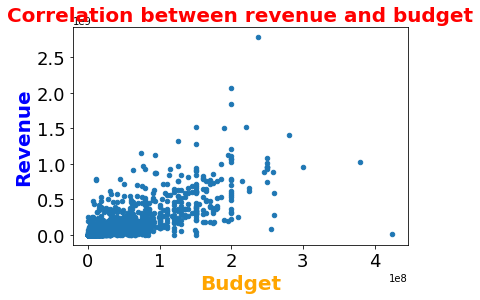

In [46]:
# Describe the correlation between revenue and budget
df.plot(x="budget", y="revenue", kind="scatter", fontsize=18)
label_one('Budget')
label_two('Revenue')
title('Correlation between revenue and budget')

There is a positive relationship between revenue and budget.
When production companies make a large budget, this will  increase the revenue 

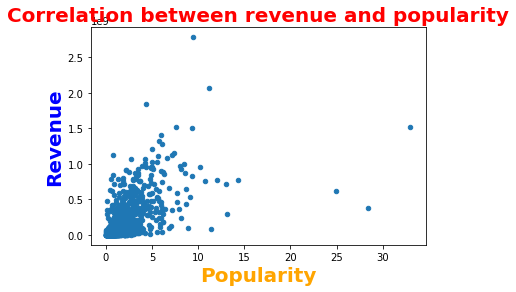

In [47]:
# Describe the correlation between revenue and popularity
df.plot(x="popularity", y="revenue", kind="scatter")
label_one('Popularity')
label_two('Revenue')
title('Correlation between revenue and popularity')

There is a positive relationship between the most famous genres such as drama and increased revenue

<a id='conclusions'></a>
## Conclusions
The most popular genres is Drama. we have possitive correlation between budjet , popularity and revenue. That mean if budjet or popularity increase we have high revenue.

#### limitation
The most popular genres have not been clarified how to collect data and their sample size


## Submitting your Project 


In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295